<a href="https://colab.research.google.com/github/magistery-tps/dm-cyt-tp2/blob/main/create_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import clear_output
import sys
import os.path
from os import path

def is_runing_into_colab_env():
    try:
        import google.colab
        return True
    except:
        return False

## 1. Instalacion de paquetes

Bajo paquete para trabajar con EEG- Me permite ver la topografía

In [3]:
# if is_runing_into_colab_env(): 
    # !pip install

## 2. Descargar dataset

Se descarga el dataset y lo descomprime en `~/dataset`.

In [4]:
filename     = "strength.SWOW-EN.R1.csv"
dataset_url  =  f'https://raw.githubusercontent.com/magistery-tps/dm-cyt-tp2/main/datasets/{filename}.zip'

if is_runing_into_colab_env():
    !cd ~
    !rm -rf datasets
    !rm -rf {filename}.zip
    !wget  {dataset_url}
    !unzip {filename}.zip
    !mkdir datasets
    !mv {filename} datasets
    !rm {filename}.zip

## 3. Importa libreria del proyecto

In [5]:
if is_runing_into_colab_env():
    if path.exists('/content/dm-cyt-tp2'):
        print('Pull...\n')
        !cd dm-cyt-tp2; git pull origin main
    else:
        print('Clone...\n')
        !git clone https://github.com/magistery-tps/dm-cyt-tp2.git

In [6]:
sys.path.append('/content/dm-cyt-tp2/src' if is_runing_into_colab_env() else './src')

## 4. Importa paquetes externos

In [7]:
import numpy as np
import pandas as pd

https://smallworldofwords.org/en/project/research

In [23]:
dataset = pd.read_csv(f'../datasets/{filename}', nrows=10000, sep='\t')

In [36]:
pairs = dataset[['cue','response']]
pairs.head()

,cue,response
0,a,one
1,a,the
2,a,b
3,a,an
4,a,first


¿Cuántas claves y respuestas son únicas?

In [37]:
print(pairs['cue'].unique().shape)
print(pairs['response'].unique().shape)

(250,)
(5508,)


¿cuántas palabras de R1 están en Cue? ¿alrevés?

In [38]:
print(sum(pairs['response'].isin(pairs['cue'].unique())))
print(sum(pairs['cue'].isin(pairs['response'].unique())))

370
6493


In [39]:
# Sacar palabras de una letra
pairs.drop(pairs[pairs['cue'].str.len().lt(2)].index, inplace=True)
print(pairs.shape[0])
pairs.drop(pairs[pairs['response'].str.len().lt(2)].index, inplace=True)
print(pairs.shape[0])

# Sacar nan
pairs.dropna()
print(pairs.shape[0])

9958
9953
9953


/home/adrian/.conda/envs/dm-cyt-tp2/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
print(sum(pairs['response'].isin(pairs['cue'].unique())==False))
print(sum(pairs['cue'].isin(pairs['response'].unique())==False))

# Sacar palabras que no este en cue Y en R1
pairs.drop(pairs[pairs['response'].isin(pairs['cue'].unique())==False].index, inplace=True)
pairs.drop(pairs[pairs['cue'].isin(pairs['response'].unique())==False].index, inplace=True)

9587
3519


<AxesSubplot:>

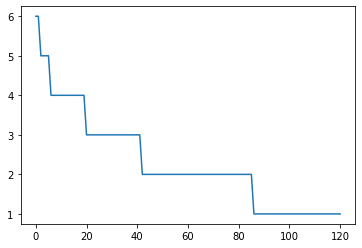

In [41]:
# Histograma de frecuencia para claves
# new_df = df.mytext_new.str.split(expand=True).stack().value_counts().reset_index()
new_df = pairs['cue'].str.split(expand=True).stack().value_counts().reset_index()
new_df.columns = ['Word', 'Frequency'] 
# new_df.head(20)
new_df['Frequency'].plot()

<AxesSubplot:>

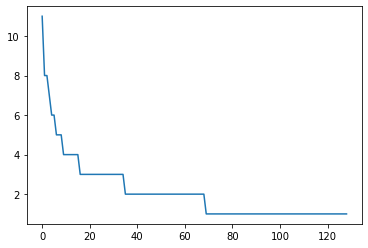

In [42]:
# Histograma de frecuencia para claves
# new_df = df.mytext_new.str.split(expand=True).stack().value_counts().reset_index()
new_dfR = pairs['response'].str.split(expand=True).stack().value_counts().reset_index()
new_dfR.columns = ['Word', 'Frequency'] 
# new_df.head(20)
new_dfR['Frequency'].plot()